# Stock Data Preparation

This is probably the least glamorous step in model building, but definitely one of the most important.

It involves getting the raw real-world data into a format compatible for modelling. It consists of exploring and manipulating the data. This desired format is a dataset with independent variables (predictors) and a dependent variable (target).

So let's start by importing the libraries we will need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Exploring


We have information on:

* Daily stock price movements for 34 of the largest companies in SA
* Daily price movements in the SA Top 40 Futures index
* Quarterly fundamental information on the the same 34 companies
* Monthly interest rates in SA

Let's read the above data in.

In [2]:
# Fundamental information
fn = pd.read_csv('fundamentals.csv', parse_dates=True,infer_datetime_format= True)

# Stock price movements
sp = pd.read_csv('stock_prices.csv', parse_dates=True,infer_datetime_format= True)

# Interest rates
ir = pd.read_csv('interest_rates.csv', parse_dates=True,infer_datetime_format= True)

# Futures prices
fp = pd.read_csv('futures_prices.csv', parse_dates=True,infer_datetime_format= True)

# Company lookup table
cl = pd.read_csv('comp_lookup.csv')

We look at the head of each dataset to see what the data looks like.

In [3]:
fn.head()

,company_index,Date,Revenue,Cost_of_Sales,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
0,1,2009/07/30,681.7,521.2,160.5,317.1,230.4,1.5,0.6,578.0,396.3,324.1,336.8,692.8
1,1,2009/10/31,880.6,616.8,263.8,-973.8,-824.5,221.5,0.0,604.5,270.3,305.4,324.1,854.5
2,1,2010/02/17,951.4,621.9,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
3,1,2010/05/06,845.3,606.0,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
4,1,2010/08/11,991.8,609.9,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0


In [4]:
sp.head()

,company_index,Date,Close,Open,High,Low,Vol,Change
0,1,2009/10/14,33403.0,33817.0,34000.0,33213.0,979600.0,-0.0044
1,1,2009/10/15,32499.0,33095.0,33494.0,32101.0,1050000.0,-0.0271
2,1,2009/10/16,33200.0,32500.0,33490.0,32350.0,1160000.0,0.0216
3,1,2009/10/19,32950.0,33000.0,33780.0,32610.0,734160.0,-0.0075
4,1,2009/10/20,32563.0,33450.0,33681.0,32300.0,1020000.0,-0.0117


In [5]:
ir.head()

,Date,rates
0,2009/10/01,6.95
1,2009/11/01,7.01
2,2009/12/01,7.07
3,2010/01/01,7.11
4,2010/02/01,7.08


In [6]:
fp.head()

,Date,Close,Open,High,Low,Change
0,2009/10/14,23656,23215,23678,23215,0.0193
1,2009/10/15,23758,23659,23792,23422,0.0043
2,2009/10/16,23663,23770,23894,23508,-0.0040
3,2009/10/19,23989,23659,24033,23641,0.0138
4,2009/10/20,23978,23993,24166,23873,-0.0005


In [7]:
cl.head()

,index,symbol,company
0,1,ANGJ,Anglogold Ashanti Ltd
1,2,APNJ,Aspen Pharmacare Holdings Ltd
2,3,ARIJ,African Rainbow Minerals Ltd
3,4,BGAJ,Barclays Africa Group Ltd
4,5,BILJ,BHP Billiton PLC


The fundamentals and stock price data has a company index but no company name. We should use the company lookup table to add the name to the datasets.

In [8]:
# Merge fundamentals and company lookup and drop the unnecessary columns
fn = pd.merge(left=fn, right=cl, how='left', left_on='company_index', right_on='index')\
.drop(['company_index', 'index', 'symbol'], axis=1)

# Merge stock prices and company lookup and drop the unnecessary columns
sp = pd.merge(left=sp, right=cl, how='left', left_on='company_index', right_on='index')\
.drop(['company_index', 'index', 'symbol'], axis=1)

Let's look at some graphs and tables of the different datasets to get an idea what we are working with.

A plot of the futures prices over time.

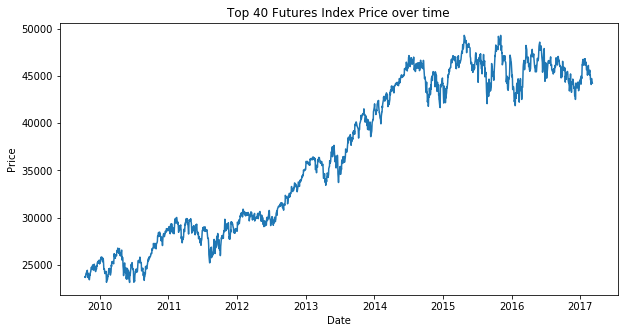

In [9]:
# Create date index to plot over time
fp['Date_time'] = fp['Date'].apply(lambda x: pd.to_datetime(x))
fp = fp.set_index('Date_time')

# Create figure and axes and set figure size
f, ax = plt.subplots(figsize=(10,5))

# Plot
ax.plot(fp['Close'])               
ax.set_title("Top 40 Futures Index Price over time") 
ax.set_xlabel('Date')                  
ax.set_ylabel('Price')         

A plot of interest rates over time.

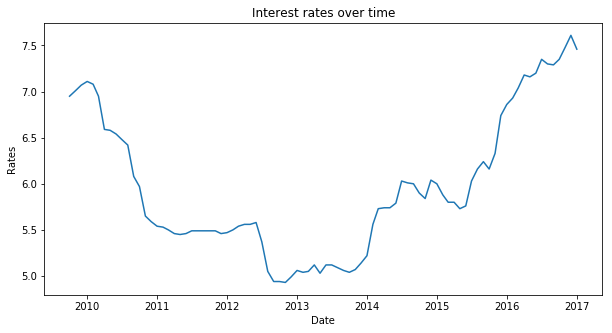

In [10]:
# Create date index to plot over time
ir['Date_time'] = ir['Date'].apply(lambda x: pd.to_datetime(x))
ir = ir.set_index('Date_time')

# Create figure and axes and set figure size
f, ax = plt.subplots(figsize=(10,5))

# Plot
ax.plot(ir['rates'])               
ax.set_title("Interest rates over time") 
ax.set_xlabel('Date')                  
ax.set_ylabel('Rates')  

A barplot of the average share price for each company.

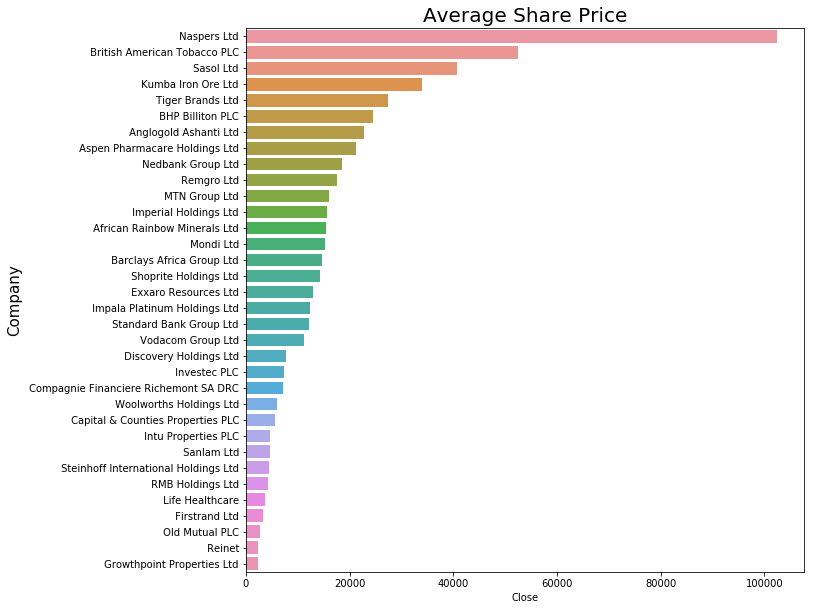

In [11]:
# Create figure and axes and set figure size
f, ax = plt.subplots(figsize=(10,10))

# Create sorted average share prices per company
a = sp.groupby('company').mean()['Close'].sort_values(ascending=False)

# Barplot
sns.barplot(x=a, y=a.index)
ax.set_title('Average Share Price', fontsize=20)
ax.set_ylabel('Company', fontsize=15)

A table to look at the summary statistics of the fundamentals info.

In [12]:
fn.describe()

,Revenue,Cost_of_Sales,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
count,5.020000e+02,5.020000e+02,502.000000,5.020000e+02,502.000000,502.000000,502.000000,5.020000e+02,5.020000e+02,5.020000e+02,5.020000e+02,501.000000
mean,7.605861e+04,5.017630e+04,25858.566243,4.698520e+04,11809.722500,7707.670777,2694.866625,1.330621e+06,2.302707e+05,6.182714e+05,8.404268e+05,23092.332555
std,2.990052e+05,2.102294e+05,91063.199971,2.300834e+05,46531.007601,42884.180812,17988.106241,6.669606e+06,1.158695e+06,3.320928e+06,4.390989e+06,103825.203948
min,3.400000e+01,0.000000e+00,-6286.000000,-7.030000e+03,-6385.000000,0.000000,0.000000,-5.960800e+04,0.000000e+00,-4.071000e+03,0.000000e+00,-13213.000000
25%,5.880962e+03,2.321677e+03,1700.350000,7.845000e+02,602.750000,10.175000,0.000000,7.967075e+03,3.452000e+03,2.271650e+03,2.954250e+03,986.000000
50%,1.706550e+04,1.053050e+04,5188.000000,2.916500e+03,2396.000000,97.800000,52.000000,2.918200e+04,1.100430e+04,8.740000e+03,6.254000e+03,2562.605000
75%,4.015400e+04,2.298825e+04,14451.250000,8.992500e+03,6391.750000,544.000000,351.750000,9.729425e+04,3.140817e+04,4.056350e+04,2.498775e+04,7225.000000
max,2.726011e+06,2.112925e+06,702526.000000,1.829980e+06,420516.000000,413035.000000,305388.000000,4.732510e+07,1.074799e+07,4.414573e+07,3.084121e+07,854779.000000


## Manipulation

Now that we have an idea what the data looks like, we need to create one dataset with predictors and a target variable.

### Target Variable
We want to predict the stock return of a company in 60 trading days (~ 1 quarter) - so this will be the target variable.

### Predictors
We have the following data that can be used as predictors:
* Price history (stock data),
* Market expectations (SA Top 40 futures), 
* Interest rates  
* Company fundamentals  

The fundamental info is per quarter so we will have one row per company per quarter. The number of columns will be the number of predictors.

#### Return target

We will start by creating the target variable. To do this we create a function that, given a dataset, returns the stock return in 60 trading days for every day and company. We create a function so that we can get the future return for every company separately and then afterwards append all the companies together.

In [13]:
def target_creator(df):
    
    # Date
    date = df['Date']
    
    # Company
    company = df['company']
    
    # Target
    target_return = df['Close'].shift(-60) / df['Close'] - 1
    
    # Add the columns together to create a dataframe
    target_all = [date, company, target_return]
    target_all = pd.concat(target_all, axis=1)
    target_all.columns = ['Date', 'company', 'target_return']
    
    return target_all

Now we append target returns for all companies.

In [14]:
# Create column names
cols = ['company',
        'Date',
        'target_return']

# Initiate empty dataframe which we will append all the data into
return_target = pd.DataFrame(data=[], columns=cols)

# Create list of all companies
company = list(cl['company'])

# Loop through list of all companies
for c in company:
    temp = target_creator(sp[sp['company'] == c])
    return_target = return_target.append(temp)

#### Price features

Now for the features. We have price history that can be engineered into features. Here we also create a function to return the features separately for each company which we append together afterwards.

In [15]:
def feature_creator(df):   
    
    # Date
    date = df['Date']
    
    # Company
    company = df['company']
    
    # Current Price
    current = df['Close']
    
    # Moving average
    moving_ave = df['Close'].rolling(window=60).mean()

    # Moving volatility
    moving_vol = df['Close'].rolling(window=60).std()

    # Moving trading range
    temp = (df['High'] - df['Low']) 
    t_range = temp.rolling(window=60).mean()

    # Momentum - past quarter's return
    mom = (df['Close'] - df['Close'].shift(60)) / df['Close'].shift(60)
    
    # Add the columns together to create a dataframe
    features = [date, company, current, moving_ave, moving_vol, t_range, mom]
    features = pd.concat(features, axis=1)
    features.columns = ['Date',
                        'company',
                        'current_price',
                        'moving_average', 
                        'moving_volatility', 
                        'trading_range', 
                        'momentum']
    
    return features

Append price features for all companies.

In [16]:
# Create column names
cols = ['company',
        'Date',
        'current_price',
        'moving_average', 
        'moving_volatility', 
        'trading_range', 
        'momentum']

# Initiate empty dataframe which we will append all the data into
price_features = pd.DataFrame(data=[], columns=cols)

# Create list of all companies
company = list(cl['company'])

# Loop through list of all companies
for c in company:
    temp = feature_creator(sp[sp['company'] == c])
    price_features = price_features.append(temp)

Now let's merge the price features and the return target together and call it price_info. We merge on date and company.

In [17]:
price_info = price_features.merge(return_target, left_on=['Date', 'company'], right_on=['Date', 'company'])

#### Market Expectation

Next we need to create the market expectation feature using the futures prices. This will give an estimate of the total market movement over the next 60 trading days. The futures price dataset has closing price info, so we need to transform that into a return. We then merge this dataset with price_info and call it df_1.

In [18]:
# Transform closing prices into return
fp['exp_market_change'] = (fp['Close'] - fp['Close'].shift(60)) / fp['Close'].shift(60)

# Merge with price info and drop unnecessary columns
df_1 = price_info.merge(fp, how='left', left_on='Date', right_on='Date', suffixes=('', '_y'))\
.drop(['Open', 'High', 'Low', 'Close', 'Change'], axis=1)

#### Interest rates

Now we merge the interest rates with df_1 and call it df_2. Note that we merge on the year and month and not the total date. We do this since interest rate data is only monthly and we need to ensure there is interest data for every day. Otherwise when we merge the fundamentals hereafter and the date differs to that of the interest rate entry, we won't have a match and lose data.

In [19]:
df_1.head()

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change
0,2009/10/14,Anglogold Ashanti Ltd,33403.0,NaN,NaN,NaN,NaN,-0.028500,NaN
1,2009/10/15,Anglogold Ashanti Ltd,32499.0,NaN,NaN,NaN,NaN,-0.024585,NaN
2,2009/10/16,Anglogold Ashanti Ltd,33200.0,NaN,NaN,NaN,NaN,-0.066114,NaN
3,2009/10/19,Anglogold Ashanti Ltd,32950.0,NaN,NaN,NaN,NaN,-0.060395,NaN
4,2009/10/20,Anglogold Ashanti Ltd,32563.0,NaN,NaN,NaN,NaN,-0.077173,NaN


In [20]:
# Merge with df_1 info and drop unnecessary columns
df_2 = df_1.merge(ir, how='left',
                 left_on=df_1['Date'].apply(lambda x: x[0:7]),
                 right_on=ir['Date'].apply(lambda x: x[0:7]),
                 suffixes=('', '_y')).drop('Date_y', axis=1)

#### Company Fundamentals

Finally we merge the company fundamentals onto df_2 by date and company to create our final dataset called df_final.

In [99]:
df_final = df_2.merge(fn, how='left', 
                      left_on=['Date', 'company'], 
                      right_on=['Date', 'company']).dropna()

Lets see what the data looks like.

In [103]:
df_final.head()

,Date,company,current_price,momentum,moving_average,moving_volatility,trading_range,target_return,exp_market_change,rates,...,Gross_profit,Operating_profit,Net_Profit,Issue_of_shares,Share_repurchase,Non_current_assets,Current_assets,Non_current_liabilities,Current_liabilities,net_cash_op_act
87,2010/02/17,Anglogold Ashanti Ltd,29500.0,-0.103343,30598.216667,1854.530002,850.550000,0.090136,-0.016852,7.08,...,329.5,431.7,317.9,3.9,3.9,732.8,237.2,220.7,454.3,959.6
139,2010/05/06,Anglogold Ashanti Ltd,31150.0,0.139982,28743.150000,1079.933674,697.066667,-0.053612,0.044321,6.58,...,239.3,141.3,115.0,0.3,0.0,741.4,188.0,221.0,396.3,816.6
206,2010/08/11,Anglogold Ashanti Ltd,31420.0,-0.026943,31682.016667,1388.464601,864.983333,0.050286,0.008204,6.42,...,381.9,-8.9,-136.0,2.6,0.0,719.6,203.3,306.8,328.0,1003.0
270,2010/11/10,Anglogold Ashanti Ltd,34987.0,0.096771,32142.716667,784.923382,705.033333,-0.060365,0.136024,5.65,...,400.9,138.2,44.3,559.6,0.0,753.0,248.5,412.7,197.5,1056.6
338,2011/02/16,Anglogold Ashanti Ltd,33230.0,-0.007586,32411.016667,1134.366223,629.016667,-0.061601,0.076571,5.53,...,407.9,197.8,40.4,3.1,3.1,779.3,172.3,444.2,97.4,1095.5


Save the dataset as a csv in order to use it in the future.

In [104]:
df_final.to_csv('data.csv')

In the next notebook we will use the dataset created above to predict stock returns in Scikit Learn using multifactor linear regression.